## **Importing** **the** **dataset**

In [1]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/sales_data.csv')
data.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Seasonality,Epidemic,Demand
0,2022-01-01,S001,P0001,Electronics,North,195,102,252,72.72,5,Snowy,0,85.73,Winter,0,115
1,2022-01-01,S001,P0002,Clothing,North,117,117,249,80.16,15,Snowy,1,92.02,Winter,0,229
2,2022-01-01,S001,P0003,Clothing,North,247,114,612,62.94,10,Snowy,1,60.08,Winter,0,157
3,2022-01-01,S001,P0004,Electronics,North,139,45,102,87.63,10,Snowy,0,85.19,Winter,0,52
4,2022-01-01,S001,P0005,Groceries,North,152,65,271,54.41,0,Snowy,0,51.63,Winter,0,59


# Preprocessing and EDA


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76000 entries, 0 to 75999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                76000 non-null  object 
 1   Store ID            76000 non-null  object 
 2   Product ID          76000 non-null  object 
 3   Category            76000 non-null  object 
 4   Region              76000 non-null  object 
 5   Inventory Level     76000 non-null  int64  
 6   Units Sold          76000 non-null  int64  
 7   Units Ordered       76000 non-null  int64  
 8   Price               76000 non-null  float64
 9   Discount            76000 non-null  int64  
 10  Weather Condition   76000 non-null  object 
 11  Promotion           76000 non-null  int64  
 12  Competitor Pricing  76000 non-null  float64
 13  Seasonality         76000 non-null  object 
 14  Epidemic            76000 non-null  int64  
 15  Demand              76000 non-null  int64  
dtypes: f

In [3]:
data.describe()

,Inventory Level,Units Sold,Units Ordered,Price,Discount,Promotion,Competitor Pricing,Epidemic,Demand
count,76000.000000,76000.000000,76000.000000,76000.000000,76000.000000,76000.000000,76000.000000,76000.000000,76000.000000
mean,301.062842,88.827316,89.090645,67.726028,9.087039,0.328947,69.454029,0.200000,104.317158
std,226.510161,43.994525,162.404627,39.377899,7.475781,0.469834,40.943818,0.400003,46.964801
min,0.000000,0.000000,0.000000,4.740000,0.000000,0.000000,4.290000,0.000000,4.000000
25%,136.000000,58.000000,0.000000,31.997500,5.000000,0.000000,32.620000,0.000000,71.000000
50%,227.000000,84.000000,0.000000,64.500000,10.000000,0.000000,65.700000,0.000000,100.000000
75%,408.000000,114.000000,121.000000,95.830000,10.000000,1.000000,97.932500,0.000000,133.000000
max,2267.000000,426.000000,1616.000000,228.030000,25.000000,1.000000,261.220000,1.000000,430.000000


In [4]:
data.isna().sum()

,0
Date,0
Store ID,0
Product ID,0
Category,0
Region,0
Inventory Level,0
Units Sold,0
Units Ordered,0
Price,0
Discount,0


In [5]:
data.duplicated().sum()

np.int64(0)

In [6]:
data.dtypes

,0
Date,object
Store ID,object
Product ID,object
Category,object
Region,object
Inventory Level,int64
Units Sold,int64
Units Ordered,int64
Price,float64
Discount,int64


In [7]:
data.shape

(76000, 16)

In [8]:
data[data['Demand']<0]

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Seasonality,Epidemic,Demand


In [9]:
data[data['Demand']>10000]

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Seasonality,Epidemic,Demand


In [10]:
data[data['Inventory Level']<0]

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Seasonality,Epidemic,Demand


In [11]:
#Removing trailling spaces
data=data.apply(lambda x:x.str.strip() if x.dtype=='object' else x)
data

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Seasonality,Epidemic,Demand
0,2022-01-01,S001,P0001,Electronics,North,195,102,252,72.72,5,Snowy,0,85.73,Winter,0,115
1,2022-01-01,S001,P0002,Clothing,North,117,117,249,80.16,15,Snowy,1,92.02,Winter,0,229
2,2022-01-01,S001,P0003,Clothing,North,247,114,612,62.94,10,Snowy,1,60.08,Winter,0,157
3,2022-01-01,S001,P0004,Electronics,North,139,45,102,87.63,10,Snowy,0,85.19,Winter,0,52
4,2022-01-01,S001,P0005,Groceries,North,152,65,271,54.41,0,Snowy,0,51.63,Winter,0,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75995,2024-01-30,S005,P0016,Toys,North,233,63,0,29.80,5,Snowy,0,32.23,Winter,0,64
75996,2024-01-30,S005,P0017,Toys,North,137,115,141,42.92,5,Snowy,0,40.73,Winter,0,137
75997,2024-01-30,S005,P0018,Clothing,North,197,44,0,17.81,10,Snowy,0,19.41,Winter,0,68
75998,2024-01-30,S005,P0019,Furniture,North,125,58,0,151.72,0,Snowy,0,143.71,Winter,0,84


# Datetime Conversion

In [12]:
#For time series analysis ,we covert date which is a string to datetime for analysis
data['Date']=pd.to_datetime(data['Date'])
data

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Seasonality,Epidemic,Demand
0,2022-01-01,S001,P0001,Electronics,North,195,102,252,72.72,5,Snowy,0,85.73,Winter,0,115
1,2022-01-01,S001,P0002,Clothing,North,117,117,249,80.16,15,Snowy,1,92.02,Winter,0,229
2,2022-01-01,S001,P0003,Clothing,North,247,114,612,62.94,10,Snowy,1,60.08,Winter,0,157
3,2022-01-01,S001,P0004,Electronics,North,139,45,102,87.63,10,Snowy,0,85.19,Winter,0,52
4,2022-01-01,S001,P0005,Groceries,North,152,65,271,54.41,0,Snowy,0,51.63,Winter,0,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75995,2024-01-30,S005,P0016,Toys,North,233,63,0,29.80,5,Snowy,0,32.23,Winter,0,64
75996,2024-01-30,S005,P0017,Toys,North,137,115,141,42.92,5,Snowy,0,40.73,Winter,0,137
75997,2024-01-30,S005,P0018,Clothing,North,197,44,0,17.81,10,Snowy,0,19.41,Winter,0,68
75998,2024-01-30,S005,P0019,Furniture,North,125,58,0,151.72,0,Snowy,0,143.71,Winter,0,84


In [13]:
print("Date Range:",data['Date'].min(),"to",data['Date'].max())

Date Range: 2022-01-01 00:00:00 to 2024-01-30 00:00:00


In [14]:
print("Time Span:",data['Date'].max()-data['Date'].min())

Time Span: 759 days 00:00:00


In [15]:
data['Date'].unique()

<DatetimeArray>
['2022-01-01 00:00:00', '2022-01-02 00:00:00', '2022-01-03 00:00:00',
 '2022-01-04 00:00:00', '2022-01-05 00:00:00', '2022-01-06 00:00:00',
 '2022-01-07 00:00:00', '2022-01-08 00:00:00', '2022-01-09 00:00:00',
 '2022-01-10 00:00:00',
 ...
 '2024-01-21 00:00:00', '2024-01-22 00:00:00', '2024-01-23 00:00:00',
 '2024-01-24 00:00:00', '2024-01-25 00:00:00', '2024-01-26 00:00:00',
 '2024-01-27 00:00:00', '2024-01-28 00:00:00', '2024-01-29 00:00:00',
 '2024-01-30 00:00:00']
Length: 760, dtype: datetime64[ns]

In [16]:
data=data.sort_values('Date')
data=data.set_index('Date')

In [17]:
print(pd.infer_freq(data.index))#there is no gap in dataset

None


In [18]:
#creating new features
data['Year']=data.index.year
data['Month']=data.index.month
data['day']=data.index.day
data['Day_of_week']=data.index.day_name()
data

,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Seasonality,Epidemic,Demand,Year,Month,day,Day_of_week
Date,,,,,,,,,,,,,,,,,,,
2022-01-01,S001,P0001,Electronics,North,195,102,252,72.72,5,Snowy,0,85.73,Winter,0,115,2022,1,1,Saturday
2022-01-01,S004,P0013,Groceries,West,136,104,385,20.24,10,Snowy,0,18.90,Winter,0,110,2022,1,1,Saturday
2022-01-01,S004,P0012,Electronics,West,111,111,113,118.15,0,Snowy,0,133.46,Winter,0,103,2022,1,1,Saturday
2022-01-01,S004,P0011,Clothing,West,195,60,293,52.89,0,Snowy,0,62.29,Winter,0,61,2022,1,1,Saturday
2022-01-01,S004,P0010,Groceries,West,223,120,597,30.02,0,Snowy,0,29.15,Winter,0,128,2022,1,1,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-30,S002,P0008,Groceries,South,85,81,94,26.98,0,Snowy,0,24.65,Winter,0,96,2024,1,30,Tuesday
2024-01-30,S002,P0007,Toys,South,414,126,0,26.84,10,Snowy,0,29.55,Winter,0,109,2024,1,30,Tuesday
2024-01-30,S002,P0006,Clothing,South,98,96,117,63.58,10,Snowy,0,76.22,Winter,0,118,2024,1,30,Tuesday


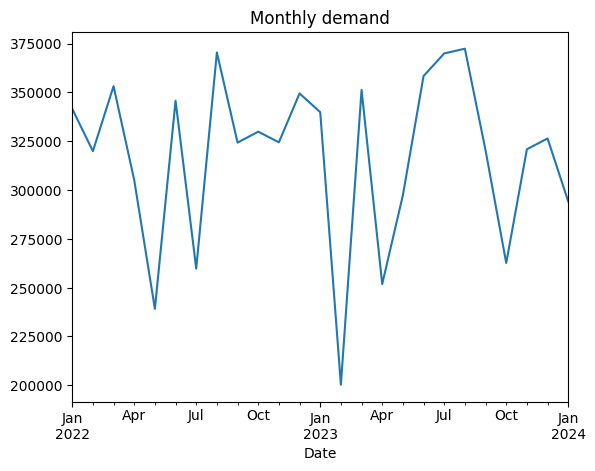

In [19]:
import matplotlib.pyplot as plt
Monthly_demand=data['Demand'].resample('ME').sum()
plt.title("Monthly demand")
Monthly_demand.plot();

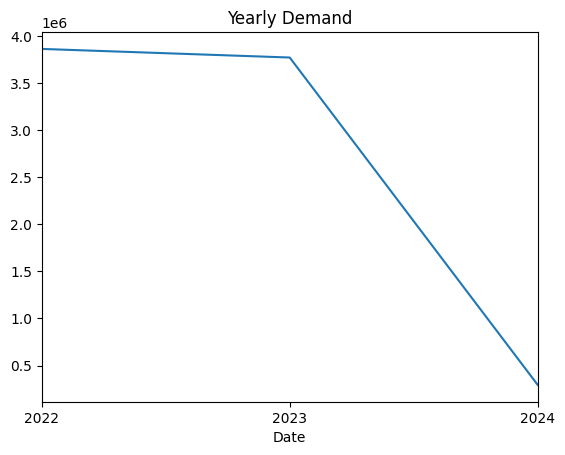

In [20]:
Yearly_demand=data['Demand'].resample('YE').sum()
plt.title('Yearly Demand')
Yearly_demand.plot();

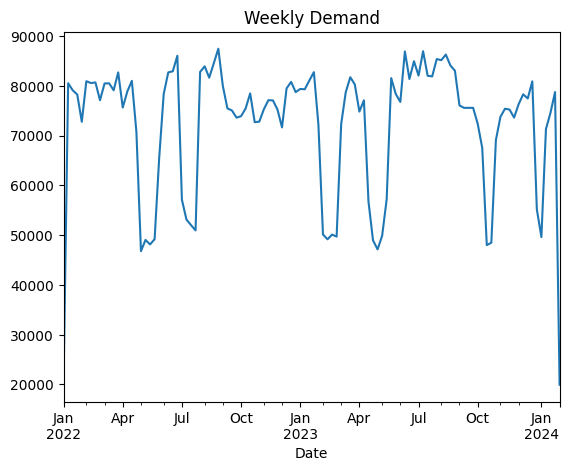

In [21]:
Weekly_demand=data['Demand'].resample('W').sum()
plt.title('Weekly Demand')
Weekly_demand.plot();

In [22]:
data['Category'].value_counts().sort_values(ascending=True)

,count
Category,
Electronics,9120
Toys,10640
Clothing,12160
Furniture,13680
Groceries,30400


In [23]:
data.groupby('Category')['Demand'].sum().sort_values(ascending=True)

,Demand
Category,
Electronics,889036
Toys,985338
Furniture,1006590
Clothing,1369456
Groceries,3677684


In [24]:
data.groupby('Category')['Inventory Level'].sum().sort_values(ascending=True)

,Inventory Level
Category,
Toys,2437749
Electronics,2638055
Furniture,3421024
Clothing,3430379
Groceries,10953569


In [25]:
data.groupby('Region')['Demand'].sum().sort_values(ascending=True)

,Demand
Region,
West,1529651
East,1618324
South,1625471
North,3154658


# Detecting Outlier

<Axes: ylabel='Demand'>

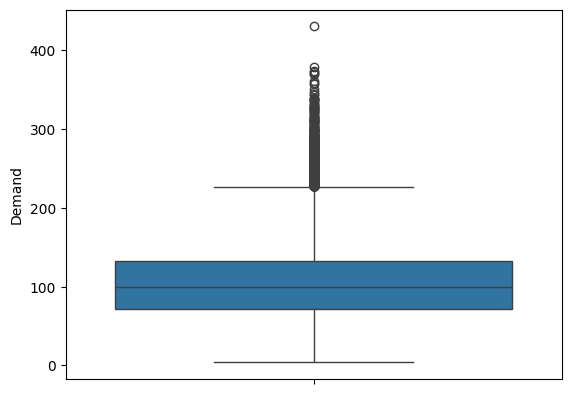

In [26]:
import seaborn as sns
sns.boxplot(data['Demand'])

In [27]:
#transformation
import numpy as np
data['demand_log']=np.log1p(data['Demand'])
data

,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Seasonality,Epidemic,Demand,Year,Month,day,Day_of_week,demand_log
Date,,,,,,,,,,,,,,,,,,,,
2022-01-01,S001,P0001,Electronics,North,195,102,252,72.72,5,Snowy,0,85.73,Winter,0,115,2022,1,1,Saturday,4.753590
2022-01-01,S004,P0013,Groceries,West,136,104,385,20.24,10,Snowy,0,18.90,Winter,0,110,2022,1,1,Saturday,4.709530
2022-01-01,S004,P0012,Electronics,West,111,111,113,118.15,0,Snowy,0,133.46,Winter,0,103,2022,1,1,Saturday,4.644391
2022-01-01,S004,P0011,Clothing,West,195,60,293,52.89,0,Snowy,0,62.29,Winter,0,61,2022,1,1,Saturday,4.127134
2022-01-01,S004,P0010,Groceries,West,223,120,597,30.02,0,Snowy,0,29.15,Winter,0,128,2022,1,1,Saturday,4.859812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-30,S002,P0008,Groceries,South,85,81,94,26.98,0,Snowy,0,24.65,Winter,0,96,2024,1,30,Tuesday,4.574711
2024-01-30,S002,P0007,Toys,South,414,126,0,26.84,10,Snowy,0,29.55,Winter,0,109,2024,1,30,Tuesday,4.700480
2024-01-30,S002,P0006,Clothing,South,98,96,117,63.58,10,Snowy,0,76.22,Winter,0,118,2024,1,30,Tuesday,4.779123


In [28]:
Q1=data['Demand'].quantile(0.25)
Q3=data['Demand'].quantile(0.75)
IQR=Q3-Q1
outliers=data[((data['Demand']<(Q1-1.5*IQR))|(data['Demand']>(Q3+1.5*IQR)))]
outliers

,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Seasonality,Epidemic,Demand,Year,Month,day,Day_of_week,demand_log
Date,,,,,,,,,,,,,,,,,,,,
2022-01-01,S001,P0002,Clothing,North,117,117,249,80.16,15,Snowy,1,92.02,Winter,0,229,2022,1,1,Saturday,5.438079
2022-01-02,S002,P0010,Groceries,South,318,179,0,101.56,25,Cloudy,1,98.18,Winter,0,234,2022,1,2,Sunday,5.459586
2022-01-04,S004,P0009,Clothing,West,299,201,0,143.79,15,Cloudy,1,165.24,Winter,0,235,2022,1,4,Tuesday,5.463832
2022-01-04,S003,P0014,Groceries,East,128,128,688,101.60,25,Sunny,1,110.10,Winter,0,227,2022,1,4,Tuesday,5.429346
2022-01-05,S003,P0019,Groceries,East,106,106,317,69.98,25,Sunny,1,74.67,Winter,0,307,2022,1,5,Wednesday,5.730100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-24,S001,P0003,Clothing,North,514,171,0,76.92,10,Cloudy,1,66.82,Winter,0,238,2024,1,24,Wednesday,5.476464
2024-01-24,S002,P0009,Groceries,South,320,320,603,80.61,20,Sunny,1,94.80,Winter,0,284,2024,1,24,Wednesday,5.652489
2024-01-26,S005,P0005,Groceries,North,104,104,400,19.54,20,Cloudy,1,21.35,Winter,0,248,2024,1,26,Friday,5.517453


In [29]:
data[['Demand','Inventory Level']].corr()

,Demand,Inventory Level
Demand,1.000000,0.126618
Inventory Level,0.126618,1.000000


In [30]:
data[['Demand','Promotion']].corr()

,Demand,Promotion
Demand,1.000000,0.282537
Promotion,0.282537,1.000000


In [31]:
data[['Demand','Discount']].corr()

,Demand,Discount
Demand,1.000000,0.224723
Discount,0.224723,1.000000


In [32]:
data[['Demand','Price']].corr()

,Demand,Price
Demand,1.000000,-0.023461
Price,-0.023461,1.000000


In [33]:
data['Region'].unique()

array(['North', 'West', 'East', 'South'], dtype=object)

In [34]:
#No error against codebook
valid_regions = ['North', 'South', 'East', 'West']
invalid_values = data[~data['Region'].isin(valid_regions)]
invalid_values

,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Seasonality,Epidemic,Demand,Year,Month,day,Day_of_week,demand_log
Date,,,,,,,,,,,,,,,,,,,,


In [35]:
num_cols = ['Inventory Level','Units Sold','Units Ordered','Price','Discount',
            'Competitor Pricing','Demand']

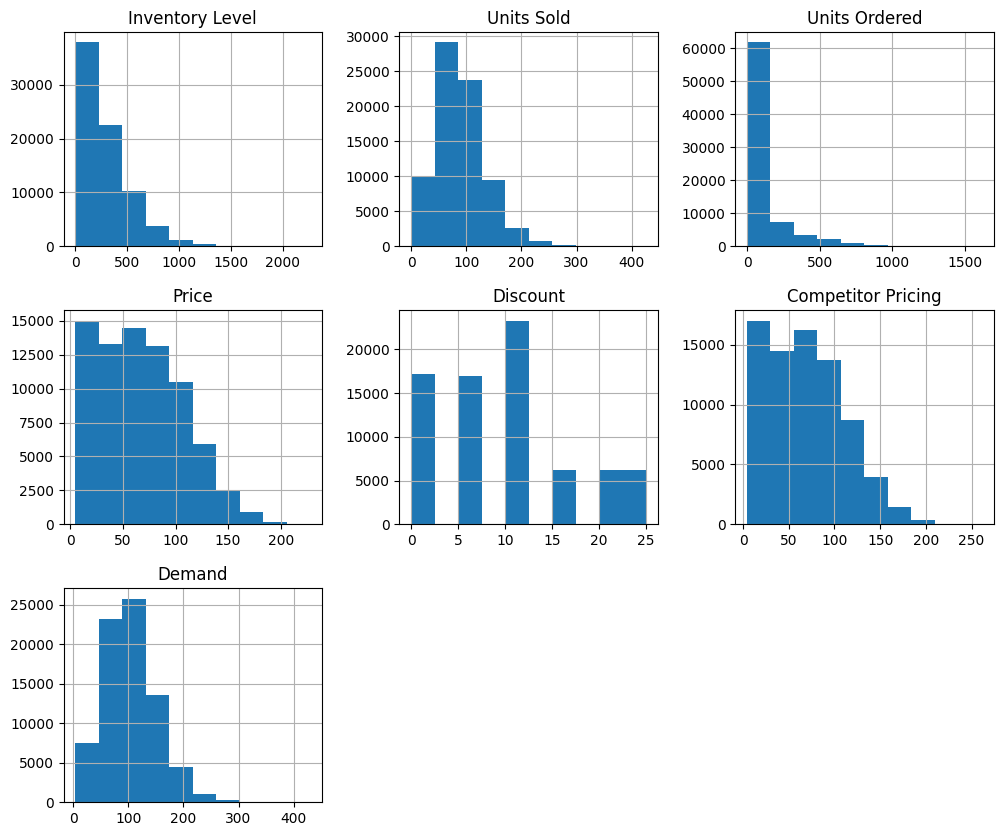

In [37]:
data[num_cols].hist(figsize=(12,10))
plt.title("Histogram of Numerical Features")
plt.show()

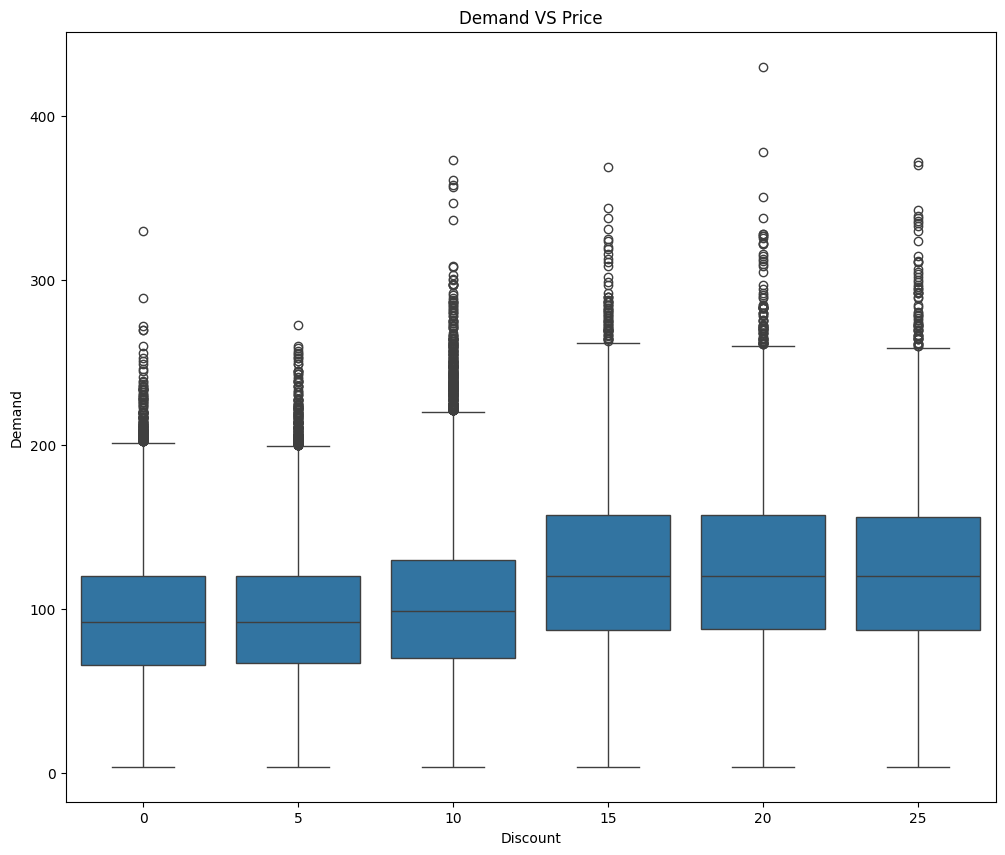

In [45]:
plt.figure(figsize=(12,10))
sns.boxplot(data=data,x='Discount',y='Demand')
plt.title("Demand VS Price")
plt.show()

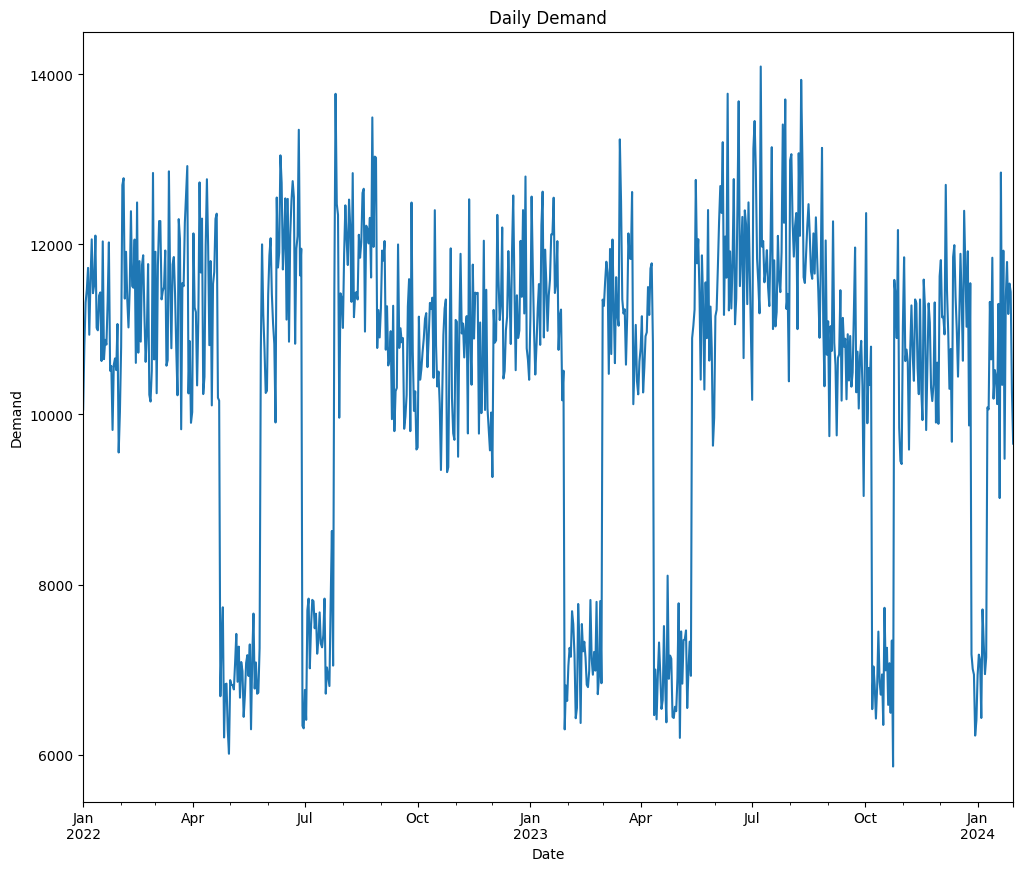

In [46]:
plt.figure(figsize=(12,10))
daily_demand=data.groupby('Date')['Demand'].sum()
daily_demand.plot()
plt.title("Daily Demand")
plt.xlabel("Date")
plt.ylabel("Demand")
plt.show()

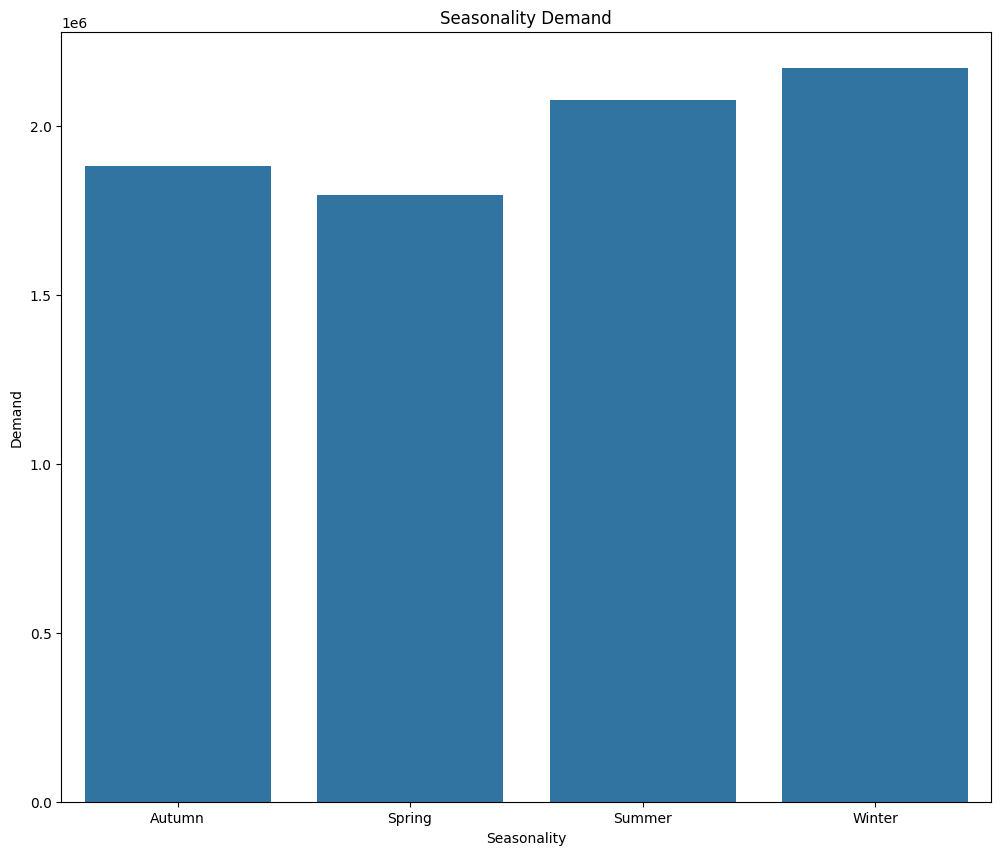

In [49]:
plt.figure(figsize=(12,10))
seasonality_demand=data.groupby('Seasonality')['Demand'].sum()
sns.barplot(x=seasonality_demand.index,y=seasonality_demand.values)
plt.title("Seasonality Demand")
plt.xlabel("Seasonality")
plt.ylabel("Demand")
plt.show()

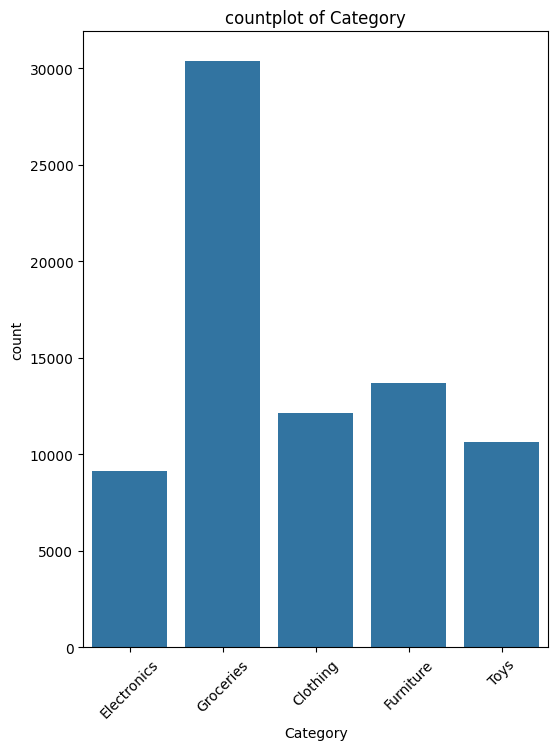

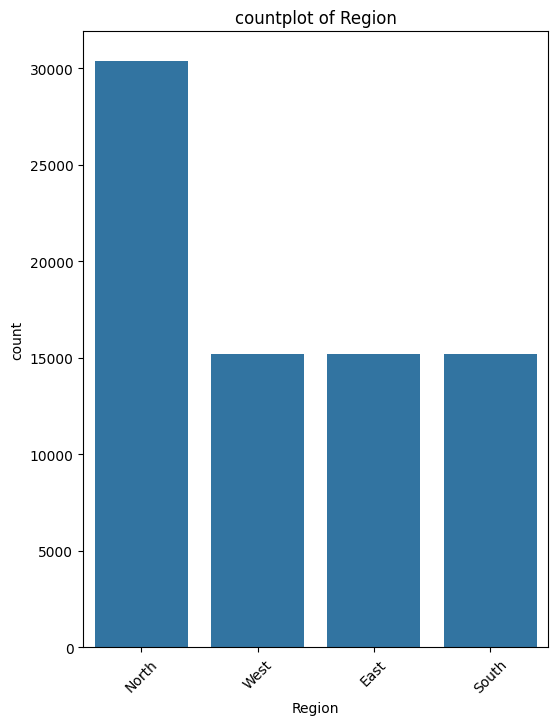

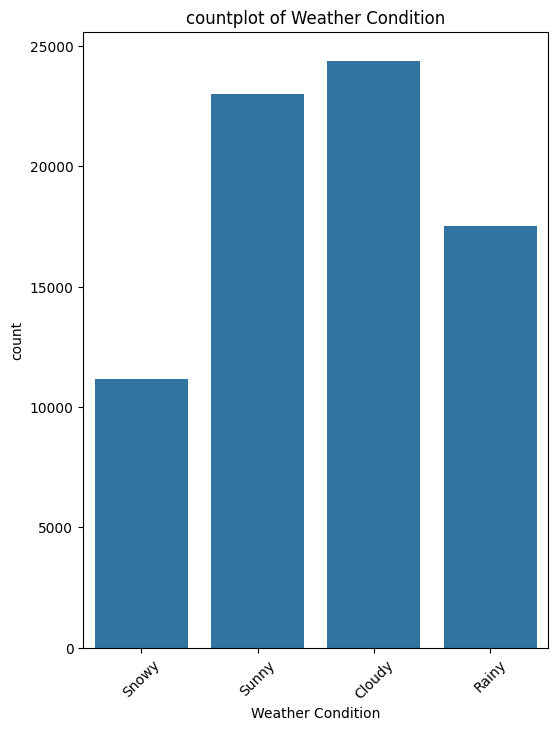

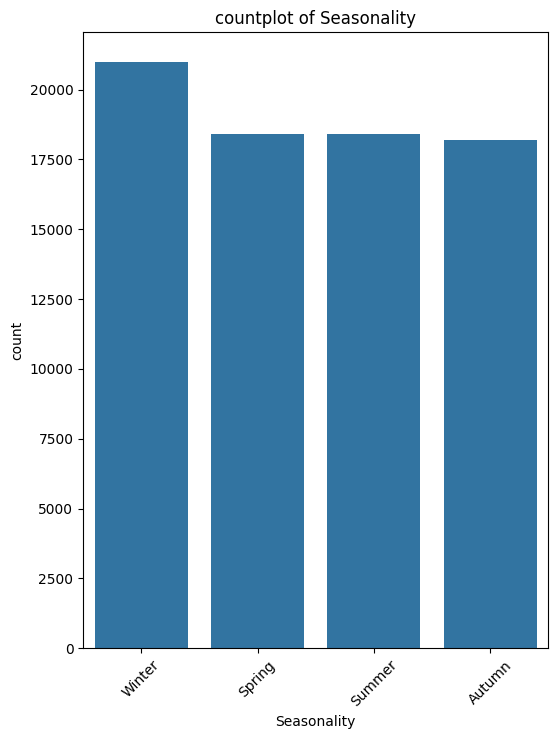

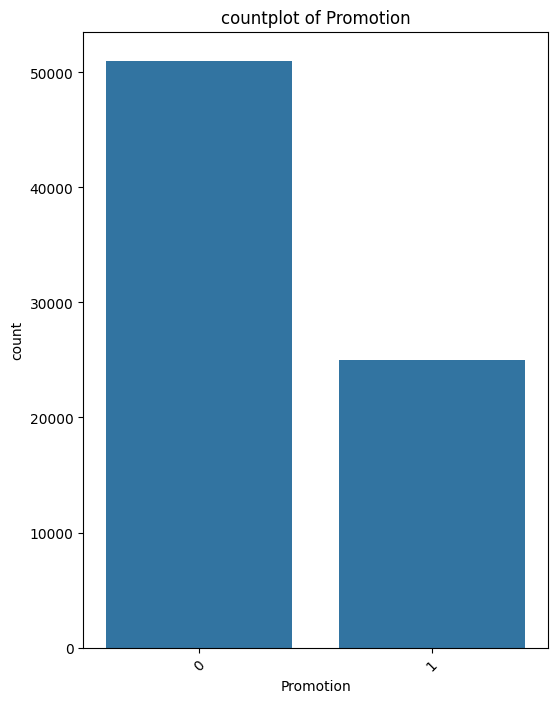

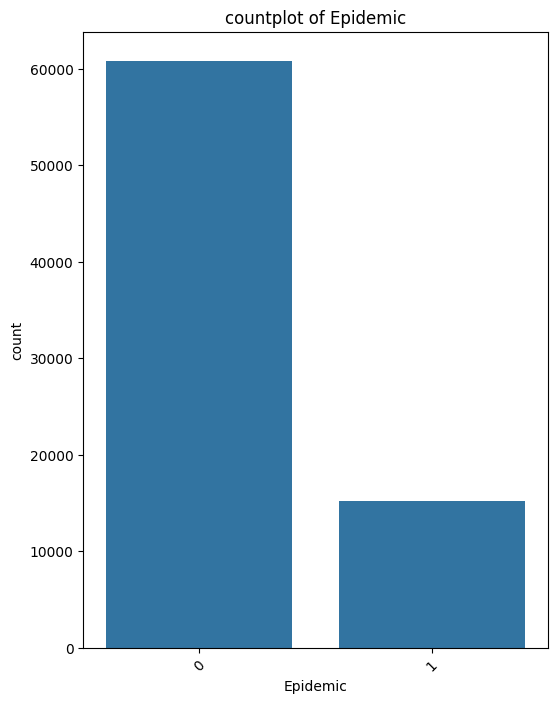

In [51]:
cat_cols = ['Category','Region','Weather Condition','Seasonality','Promotion','Epidemic']
for i in cat_cols:
  plt.figure(figsize=(6,8))
  sns.countplot(data=data,x=i)
  plt.title(f"countplot of {i}")
  plt.xticks(rotation=45)
  plt.show()

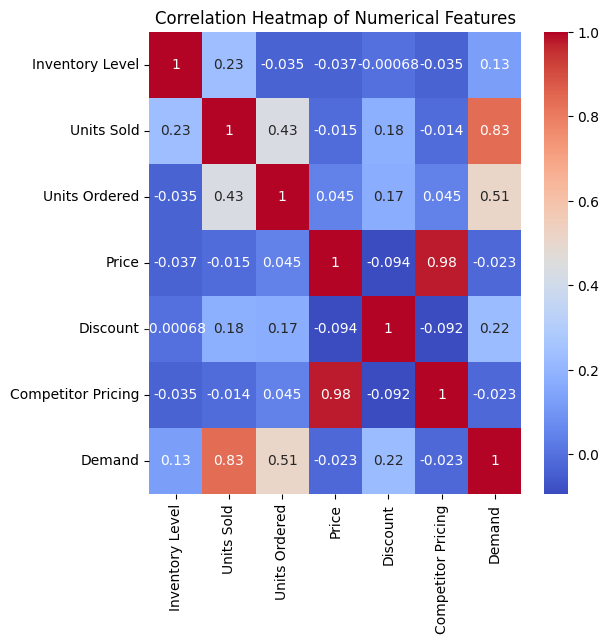

In [54]:
plt.figure(figsize=(6,6))
corr=data[num_cols].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

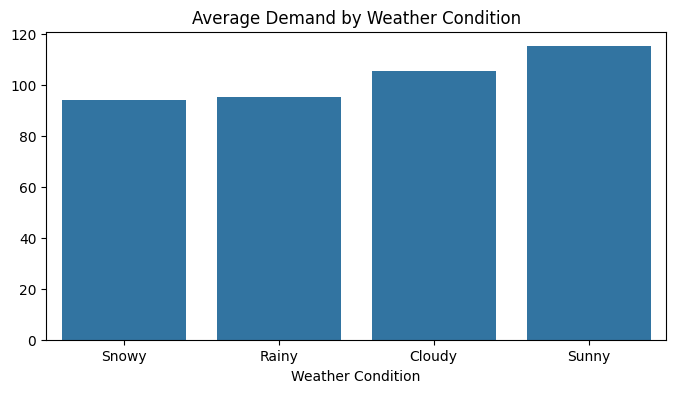

In [56]:
avg_demand_weather=data.groupby('Weather Condition')['Demand'].mean().sort_values()
plt.figure(figsize=(8,4))
sns.barplot(x=avg_demand_weather.index, y=avg_demand_weather.values)
plt.title("Average Demand by Weather Condition")
plt.show()

In [58]:
stats=data[['Inventory Level','Units Sold','Units Ordered','Price','Discount','Competitor Pricing','Demand']].describe().T
stats[['mean','std','min','25%','50%','75%','max']]

,mean,std,min,25%,50%,75%,max
Inventory Level,301.062842,226.510161,0.00,136.0000,227.0,408.0000,2267.00
Units Sold,88.827316,43.994525,0.00,58.0000,84.0,114.0000,426.00
Units Ordered,89.090645,162.404627,0.00,0.0000,0.0,121.0000,1616.00
Price,67.726028,39.377899,4.74,31.9975,64.5,95.8300,228.03
Discount,9.087039,7.475781,0.00,5.0000,10.0,10.0000,25.00
Competitor Pricing,69.454029,40.943818,4.29,32.6200,65.7,97.9325,261.22
Demand,104.317158,46.964801,4.00,71.0000,100.0,133.0000,430.00


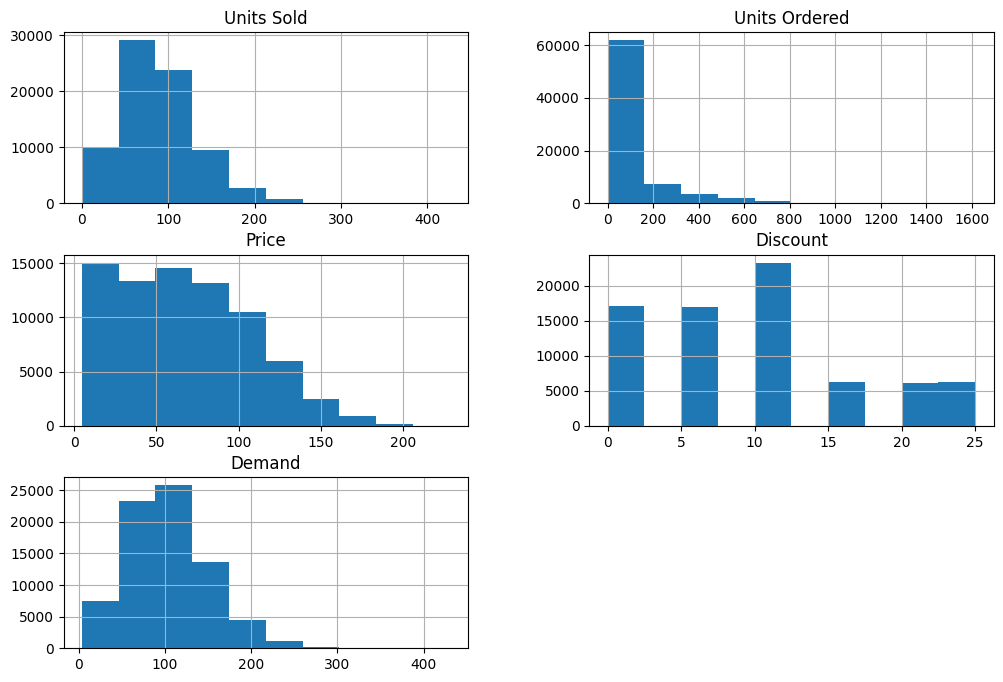

In [61]:
data[['Units Sold','Units Ordered','Price','Discount','Demand']].hist(figsize=(12,8))
plt.title("Distributions of Key Variables")
plt.show()